In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import tokenize
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RepeatedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
import plotly.express as px

# Data Wrangling

In [2]:
df = pd.read_csv('virtualInternshipData_ADS2001.csv', encoding = "latin1") # read the dataset into a pandas dataframe
df.head()

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39


In [3]:
df.dtypes

Unnamed: 0                                int64
userIDs                                   int64
implementation                           object
Line_ID                                   int64
ChatGroup                                object
content                                  object
group_id                                  int64
RoleName                                 object
roomName                                 object
m_experimental_testing                    int64
m_making_design_choices                   int64
m_asking_questions                        int64
j_customer_consultants_requests           int64
j_performance_parameters_requirements     int64
j_communication                           int64
OutcomeScore                              int64
wordCount                                 int64
dtype: object

In [4]:
df.isna().sum() # Checking for missing values

Unnamed: 0                               0
userIDs                                  0
implementation                           0
Line_ID                                  0
ChatGroup                                0
content                                  0
group_id                                 0
RoleName                                 3
roomName                                 0
m_experimental_testing                   0
m_making_design_choices                  0
m_asking_questions                       0
j_customer_consultants_requests          0
j_performance_parameters_requirements    0
j_communication                          0
OutcomeScore                             0
wordCount                                0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.duplicated().sum() # Checking for duplicates

0

In [7]:
print(df["userIDs"].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

In [8]:
print(df["implementation"].unique())

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']


In [9]:
df.groupby(["group_id"])["implementation"].unique()

group_id
2    [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o]
3    [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o]
4    [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o]
5    [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o]
6    [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o]
Name: implementation, dtype: object

In [10]:
print(df["Line_ID"].unique())

[    1     2     3 ... 19181 19182 19183]


In [11]:
print(df["ChatGroup"].unique())

['PRNLT' 'PMMA' 'PSF' 'PAM' 'PESPVP']


In [12]:
print(df["group_id"].unique())

[2 3 4 5 6]


In [13]:
print(df["RoleName"].unique())

['Mentor' 'Player']


In [14]:
print(df["roomName"].unique())

['Introduction and Workflow Tutorial with Entrance Interview'
 'Background research on dialysis' 'Graphing Surfactant Data'
 'Reflection team discussion of surfactants'
 'Summarize internal consultant requirements'
 'Choose consultants to analyze' 'Individuals design 5 prototypes'
 'Team designs batch using 1 material'
 'Individual analysis of first batch'
 'Reflection team discussion of first batch results']


In [15]:
print(df["OutcomeScore"].unique())

[4 2 5 3 0 1 6 7 8]


In [16]:
# filter the dataframe to exclude rows where RoleName is "Mentor"
df_filtered = df[df['RoleName'] == 'Player']

# group by Implementation and count the number of unique user IDs
num_students = df_filtered.groupby('implementation')['userIDs'].nunique()

# print the result
print(num_students)

implementation
a    32
b    26
c    26
d    25
e    25
f    25
g    26
h    27
i    26
j    23
k    22
l    18
m    20
n    22
o    26
Name: userIDs, dtype: int64


In [17]:
# filter the dataframe to exclude rows where RoleName is "Mentor"
df_filtered = df[df['RoleName'] == 'Mentor']

# group by Implementation and count the number of unique user IDs
num_mentors = df_filtered.groupby('implementation')['userIDs'].nunique()

# print the result
print(num_mentors)

implementation
a    2
b    2
c    1
d    2
e    2
f    2
g    1
h    1
i    1
j    1
k    1
l    1
m    3
n    2
o    1
Name: userIDs, dtype: int64


In [18]:
# filter the dataframe to exclude rows where RoleName is "Mentor"
df_filtered = df[df['RoleName'] == 'Player']

# group by Implementation and count the number of unique user IDs
num_students = df_filtered.groupby('group_id')['userIDs'].nunique()

# print the result
print(num_students)

group_id
2    78
3    73
4    75
5    72
6    71
Name: userIDs, dtype: int64


In [19]:
# filter the dataframe to exclude rows where RoleName is "Mentor"
df_filtered = df[df['RoleName'] == 'Mentor']

# group by Implementation and count the number of unique user IDs
num_mentors = df_filtered.groupby('group_id')['userIDs'].nunique()

# print the result
print(num_mentors)

group_id
2    15
3    15
4    15
5    15
6    16
Name: userIDs, dtype: int64


In [20]:
# def hex_format(red, green, blue):
#     return '#{:02X}{:02X}{:02X}'.format(red,green,blue)
# hex_format(17, 158, 201)
colors1 = (["#F2AD85", "#119EC9","#BF785E", "#BC3B48",  "#0477BF", "#A5B8C6"])

# Explarotory Data Analysis

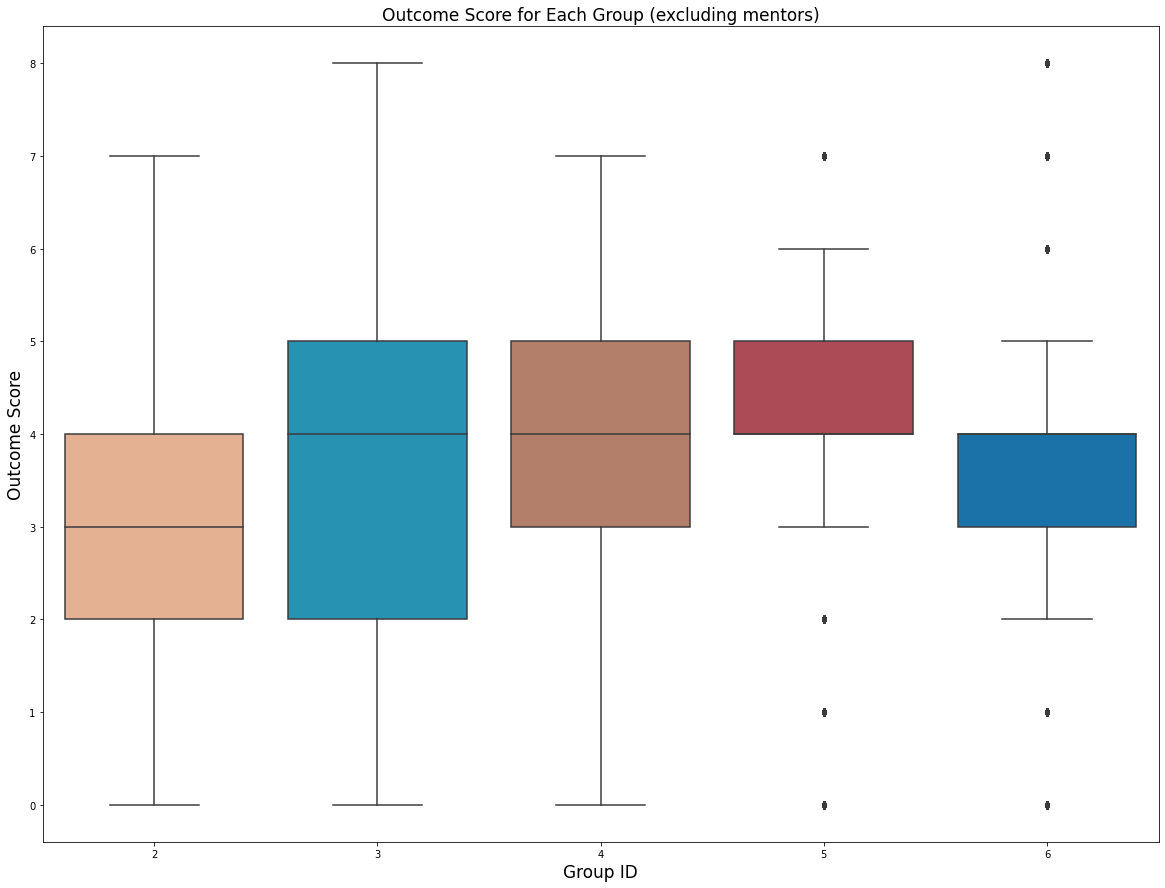

In [21]:
df_filtered = df[df['RoleName'] != 'Mentor']
plt.figure(figsize=(20, 15))
ax_1 = sns.boxplot(data=df_filtered, x="group_id", y="OutcomeScore", palette=colors1)
plt.title("Outcome Score for Each Group (excluding mentors)" ,fontsize=17)
plt.xlabel('Group ID',fontsize=17)
plt.ylabel('Outcome Score',fontsize=17)
plt.show()

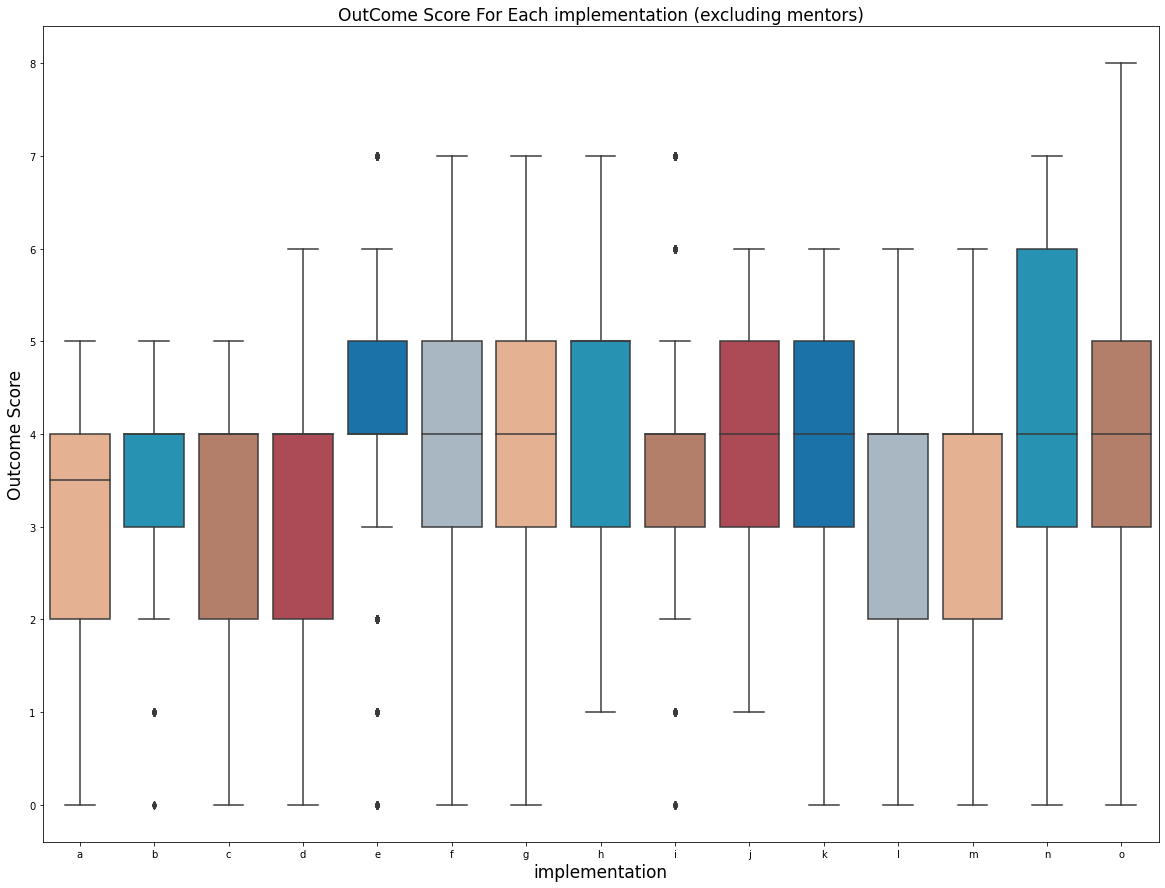

In [22]:
df_filtered = df[df['RoleName'] != 'Mentor']
plt.figure(figsize=(20,15))
ax_1 = sns.boxplot(data=df_filtered, x="implementation", y="OutcomeScore", palette=colors1)
plt.title("OutCome Score For Each implementation (excluding mentors)", fontsize=17)
plt.xlabel('implementation',fontsize=17)
plt.ylabel('Outcome Score',fontsize=17)
plt.show()

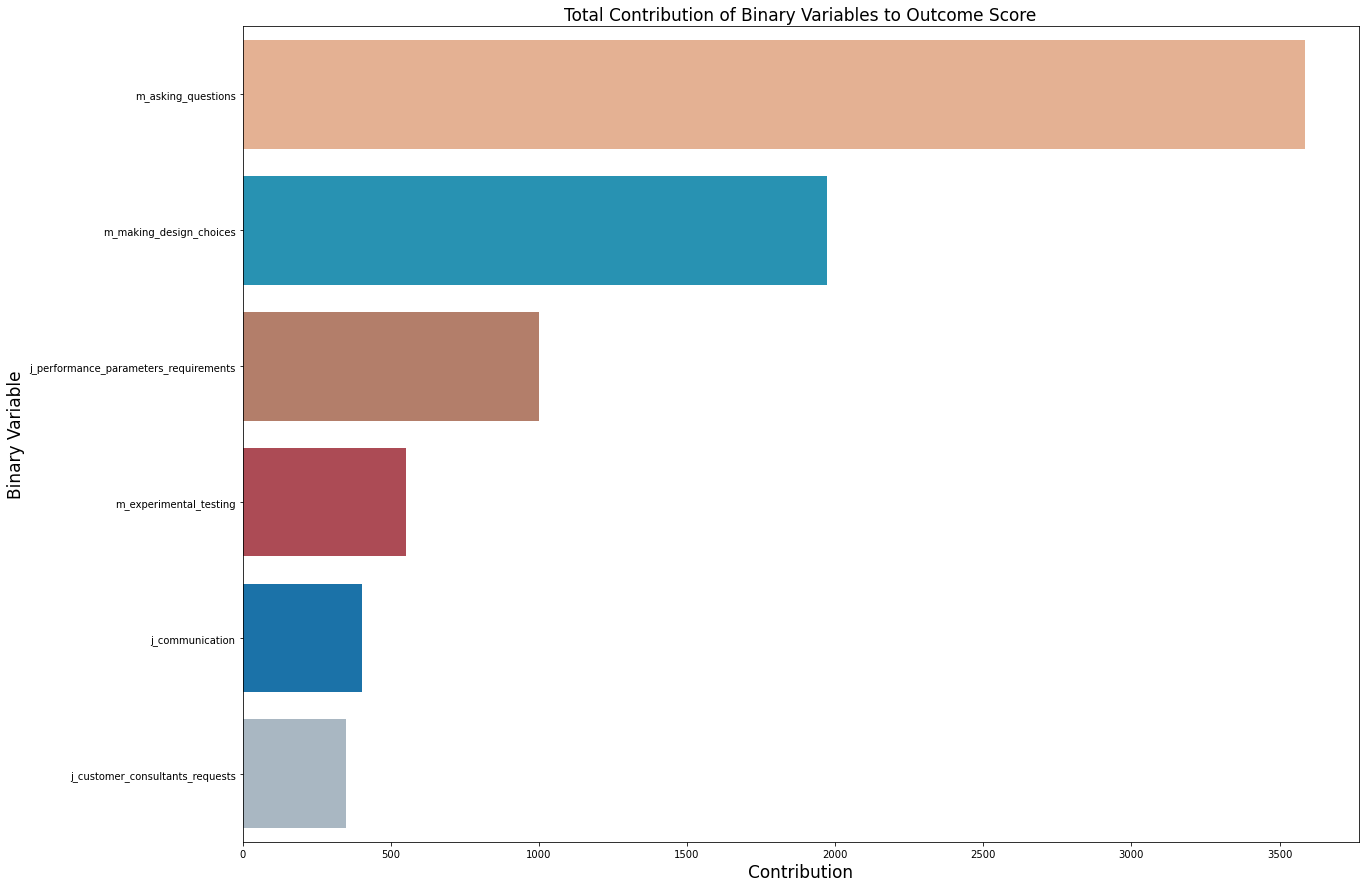

In [23]:
# create a list of binary variable names
binary_vars = ['m_experimental_testing', 'm_making_design_choices', 'm_asking_questions',
               'j_customer_consultants_requests', 'j_performance_parameters_requirements',
               'j_communication']

# calculate the total contribution of each binary variable to the outcome score
total_contribution = df[binary_vars].sum()

# sort the values of the total_contribution series
total_contribution = total_contribution.sort_values(ascending=False)

# create a bar chart of the total contribution of each binary variable to the outcome score
plt.figure(figsize=(20,15))
sns.barplot(x=total_contribution.values, y=total_contribution.index, palette=colors1)

# set the title and axes labels
plt.title('Total Contribution of Binary Variables to Outcome Score',fontsize=17)
plt.xlabel('Contribution',fontsize=17)
plt.ylabel('Binary Variable',fontsize=17)
plt.show()

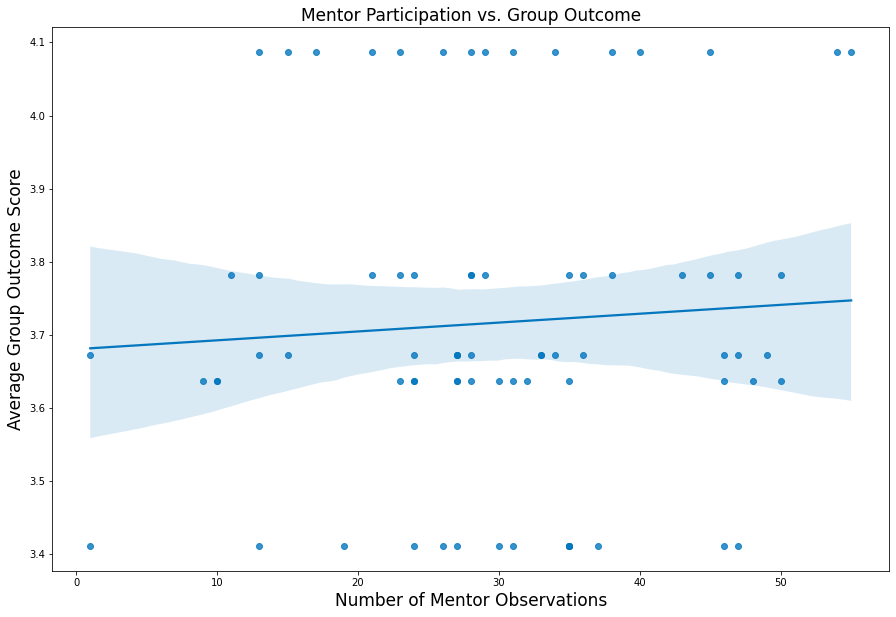

In [24]:
# calculate the average outcome score per group (excluding mentors)
group_scores = df[df['RoleName'] != 'Mentor'].groupby('group_id')['OutcomeScore'].mean()

# group the data by group_id and UserId, and count the number of rows in each group
mentor_counts = df[df['RoleName'] == 'Mentor'].groupby(['group_id', 'userIDs']).size().reset_index(name='Num_Mentor_Observations')

# merge mentor_counts with group_scores on group_id
mentor_group_data = pd.merge(mentor_counts, group_scores, on='group_id')

# create a regression plot to show the relationship between mentor observations and group outcome
plt.figure(figsize=(15, 10))
sns.regplot(data=mentor_group_data, x='Num_Mentor_Observations', y='OutcomeScore', color="#0477BF")

# set the title and axes labels
plt.title('Mentor Participation vs. Group Outcome' ,fontsize=17)
plt.xlabel('Number of Mentor Observations',fontsize=17)
plt.ylabel('Average Group Outcome Score',fontsize=17)
plt.show()

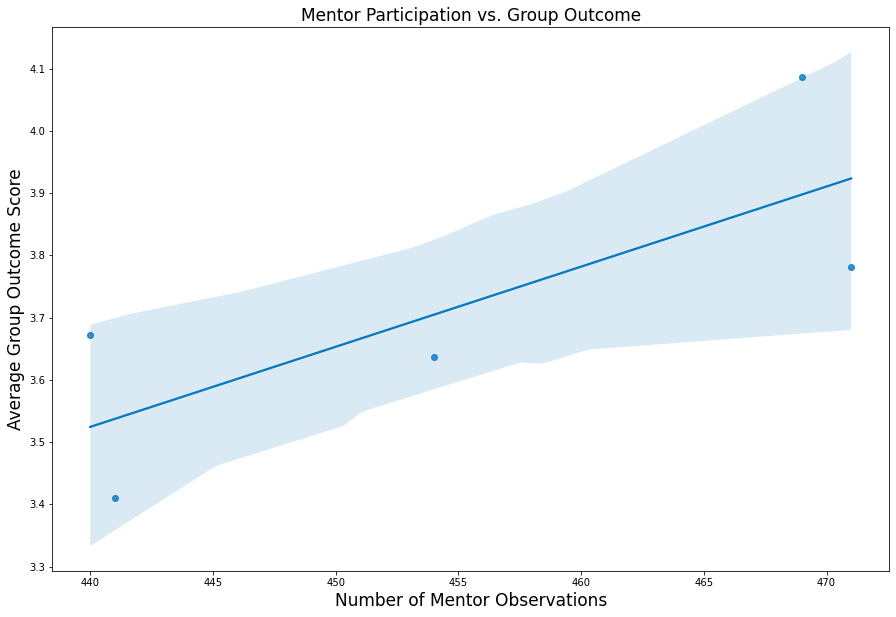

In [25]:
# calculate the average outcome score per group (excluding mentors)
group_scores = df[df['RoleName'] != 'Mentor'].groupby('group_id')['OutcomeScore'].mean()

# group the data by group_id and UserId, and count the number of rows in each group
mentor_counts = df[df['RoleName'] == 'Mentor'].groupby(['group_id']).size().reset_index(name='Num_Mentor_Observations')

# merge mentor_counts with group_scores on group_id
mentor_group_data = pd.merge(mentor_counts, group_scores, on='group_id')

# create a scatter plot with bubble size proportional to the number of mentor observations
plt.figure(figsize=(15, 10))
sns.regplot(data=mentor_group_data, x='Num_Mentor_Observations', y='OutcomeScore', color="#0477BF")


# set the title and axes labels
plt.title('Mentor Participation vs. Group Outcome', fontsize=17)
plt.xlabel('Number of Mentor Observations',fontsize=17)
plt.ylabel('Average Group Outcome Score', fontsize=17)
plt.show()

# Modelling

In [26]:
# Aggregating the data 
aggregated_train_1 = df.groupby(
    ["implementation", "userIDs"]
).agg(
    {'m_experimental_testing': 'sum', 'm_making_design_choices': 'sum', 'm_asking_questions': 'sum', 'j_customer_consultants_requests': 'sum',
    'j_performance_parameters_requirements': 'sum',
     "j_communication" : "sum", "wordCount" : "sum", "wordCount" : "sum", "OutcomeScore" : "max"})

aggregated_train_1 = aggregated_train_1.reset_index()

In [27]:
aggregated_train_1.head()

,implementation,userIDs,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,wordCount,OutcomeScore
0,a,1,3,26,30,3,6,19,3778,4
1,a,2,2,4,17,0,4,0,704,4
2,a,3,1,4,3,0,1,0,157,4
3,a,4,2,2,3,1,5,0,349,4
4,a,5,0,0,6,0,2,0,342,2


# Linear Regression Model

Training score is 0.073
Testing score is -0.003

R Squared for Training 0.012
R Squared for Testing -0.006

Intercept 3.595
Coeffecients [ 0.26145247  0.25896688  0.07911645 -0.11280111  0.0171561   0.12458026
 -0.15426232]

Accuracy Score: 0.228


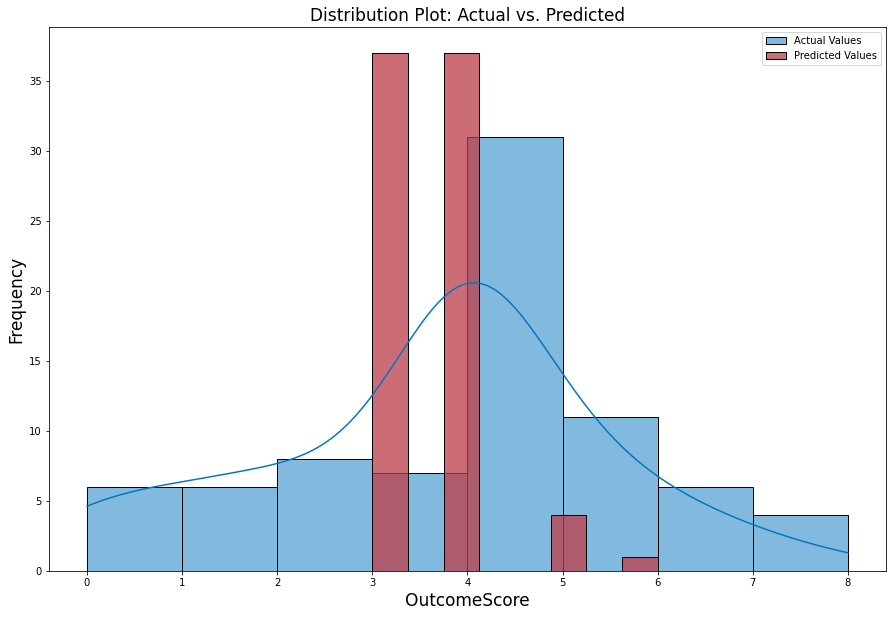

In [28]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]] 
Y = aggregated_train_1["OutcomeScore"]

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=40) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.
intercept = linear.intercept_ # Fiding the intercept
coffs = linear.coef_ # Finding the coefs

# Evaluate model performance.
training_predictions =np.round(linear.predict(X_train))  # Get model predictions for training data so we can find R^2 later
testing_predictions = np.round(linear.predict(X_test))   # Get model predictions for testing data so we can find R^2 later

rsquared_regressor_traning = r2_score(Y_train, training_predictions) # Get R^2 for training data
rsquared_regressor_testing = r2_score(Y_test, testing_predictions) # Get R^2 for testing data

# Evaluate model performance in another way.
training_score = linear.score(X_train, Y_train) # Get model score for training data
testing_score = linear.score(X_test, Y_test) # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'R Squared for Training {rsquared_regressor_traning:.3f}')
print(f'R Squared for Testing {rsquared_regressor_testing:.3f}')
print()
print(f'Intercept {intercept:.3f}')
print(f'Coeffecients {coffs}')
print()
print(f'Accuracy Score: {accuracy:.3f}')

# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

In [29]:
import statsmodels.api as sm

# Printing the regression summury results to check p-value
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           OutcomeScore   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     3.501
Date:                Sat, 27 May 2023   Prob (F-statistic):            0.00118
Time:                        14:34:14   Log-Likelihood:                -727.75
No. Observations:                 392   AIC:                             1471.
Df Residuals:                     384   BIC:                             1503.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\hudak\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Linear Regression Model Using Ridge

Training score is 0.073
Testing score is -0.002

R Squared for Training 0.015
R Squared for Testing -0.006

Intercept 3.595
Coeffecients [ 0.25000088  0.25940576  0.0801485  -0.10932949  0.01810789  0.12555181
 -0.14698363]

Accuracy Score: 0.228


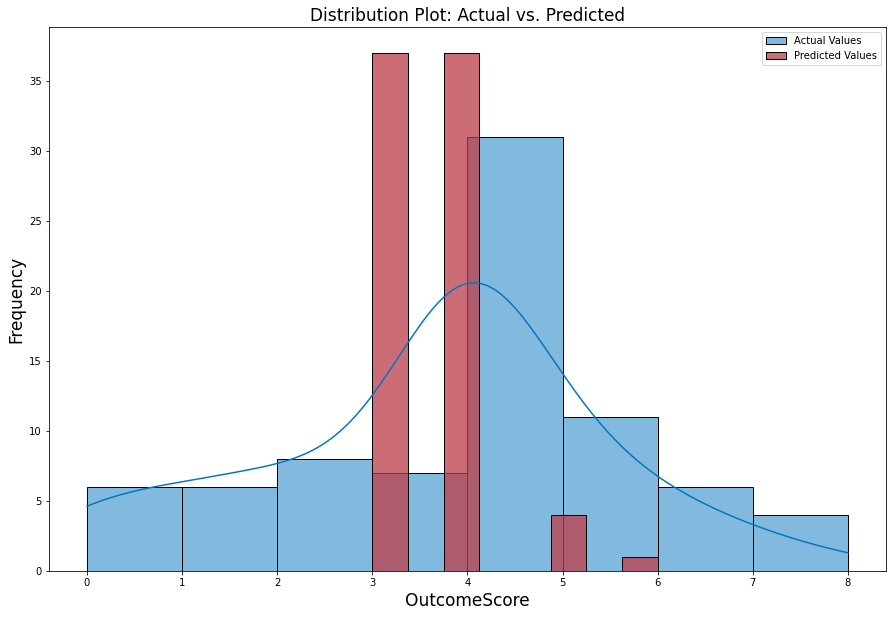

In [30]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]] 
Y = aggregated_train_1["OutcomeScore"]

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=40) 

ridge = Ridge(alpha=1.0)  # Instantiate the Ridge regression model with alpha (regularization strength) of 1.0
ridge.fit(X_train, Y_train)  # Fit the model parameters to the training data.
intercept = ridge.intercept_  # Find the intercept
coffs = ridge.coef_  # Find the coefficients

# Evaluate model performance.
training_predictions = np.round(ridge.predict(X_train))  # Get model predictions for training data so we can find R^2 later
testing_predictions = np.round(ridge.predict(X_test))  # Get model predictions for testing data so we can find R^2 later

rsquared_regressor_traning = r2_score(Y_train, training_predictions) # Get R^2 for training data
rsquared_regressor_testing = r2_score(Y_test, testing_predictions) # Get R^2 for testing data

# Evaluate model performance in another way.
training_score = ridge.score(X_train, Y_train) # Get model score for training data
testing_score = ridge.score(X_test, Y_test) # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'R Squared for Training {rsquared_regressor_traning:.3f}')
print(f'R Squared for Testing {rsquared_regressor_testing:.3f}')
print()
print(f'Intercept {intercept:.3f}')
print(f'Coeffecients {coffs}')
print()
print(f'Accuracy Score: {accuracy:.3f}')

# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()


# Logistic Regression Model

Training score is 0.387
Testing score is 0.392

R Squared for Training -0.085
R Squared for Testing -0.065

Accuracy Score: 0.392


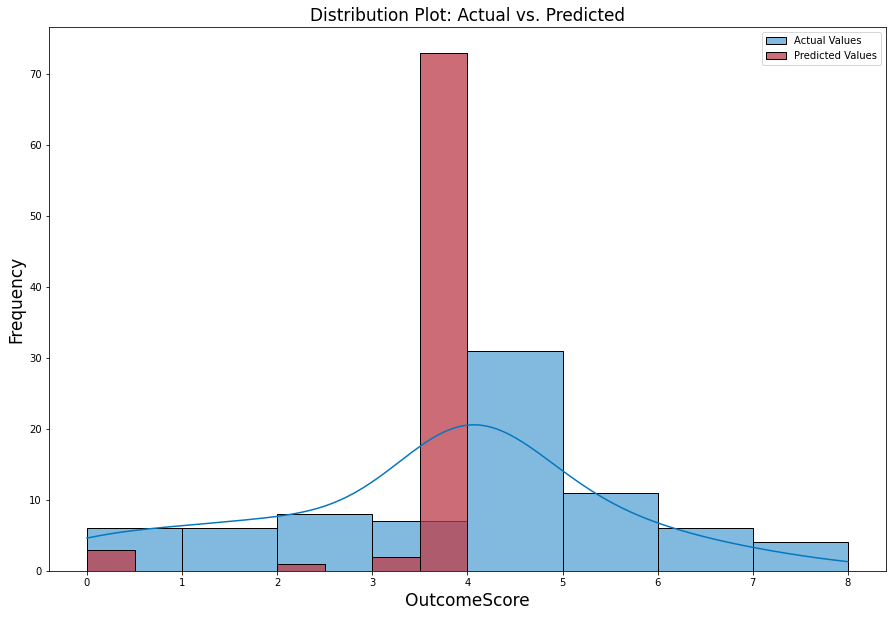

In [31]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]] 
Y = aggregated_train_1["OutcomeScore"]

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=40) 

# Construct and fit the model
logistic = LogisticRegression()  # Instantatiate the linear regression model
logistic.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = logistic.predict(X_train)  # Get model predictions for training data so we can find R^2 later
testing_predictions = logistic.predict(X_test)   # Get model predictions for testing data so we can find R^2 later

rsquared_regressor_traning = r2_score(Y_train, training_predictions) # Get R^2 for training data
rsquared_regressor_testing = r2_score(Y_test, testing_predictions) # Get R^2 for testing data

# Evaluate model performance in another way.
training_score = logistic.score(X_train, Y_train) # Get model score for training data
testing_score = logistic.score(X_test, Y_test) # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'R Squared for Training {rsquared_regressor_traning:.3f}')
print(f'R Squared for Testing {rsquared_regressor_testing:.3f}')
print()
print(f'Accuracy Score: {accuracy:.3f}')

# Plotting Training
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

# Decision Tree

c:\Users\hudak\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'max_depth': 3}

Training score is 0.399
Testing score is 0.367

R Squared for Training 0.036
R Squared for Testing -0.147

Accuracy Score: 0.367


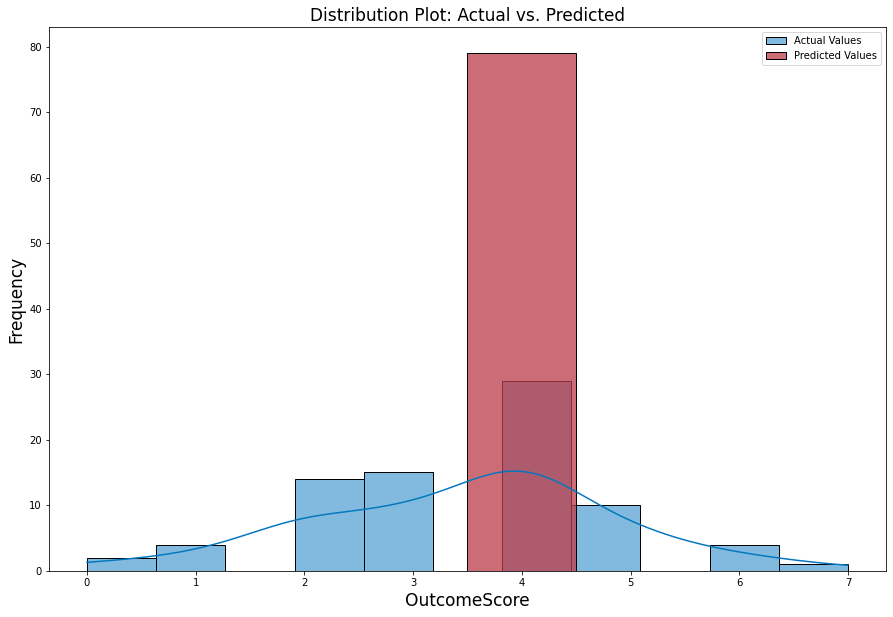

In [32]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]] 
Y = aggregated_train_1["OutcomeScore"] 

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2,
    random_state=5
) 

# Define the range of values to search
param_grid = {'max_depth': [1, 2, 3, 4, 5]}

DecisionTree = DecisionTreeClassifier(random_state = 42) 

# Create a grid search object
grid_search = GridSearchCV(DecisionTree, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X, Y)

# Print the best hyperparameters found
print(f"Best parameters: {grid_search.best_params_}")

# Retrieve the best model found by grid search
decision_tree = grid_search.best_estimator_

# Evaluate model performance.
training_predictions = decision_tree.predict(X_train) # Get model predictions for training data so we can find R^2 later
testing_predictions = decision_tree.predict(X_test)    # Get model predictions for testing data so we can find R^2 later

rsquared_regressor_traning = r2_score(Y_train, training_predictions) # Get R^2 for training data
rsquared_regressor_testing = r2_score(Y_test, testing_predictions) # Get R^2 for testing data

# Evaluate model performance in another way.
training_score = decision_tree.score(X_train, Y_train) # Get model score for training data
testing_score = decision_tree.score(X_test, Y_test) # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print()
print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'R Squared for Training {rsquared_regressor_traning:.3f}')
print(f'R Squared for Testing {rsquared_regressor_testing:.3f}')
print()
print(f'Accuracy Score: {accuracy:.3f}')

# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test, label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

# Random Forest Model

Best parameters: {'n_estimators': 500}
Best cross-validation score: -0.07

Training score is 0.857
Testing score is -0.070

R Squared for Training 0.857
R Squared for Testing -0.070

wordCount 0.418
m_experimental_testing 0.086
m_making_design_choices 0.137
m_asking_questions 0.177
j_customer_consultants_requests 0.075
j_performance_parameters_requirements 0.107


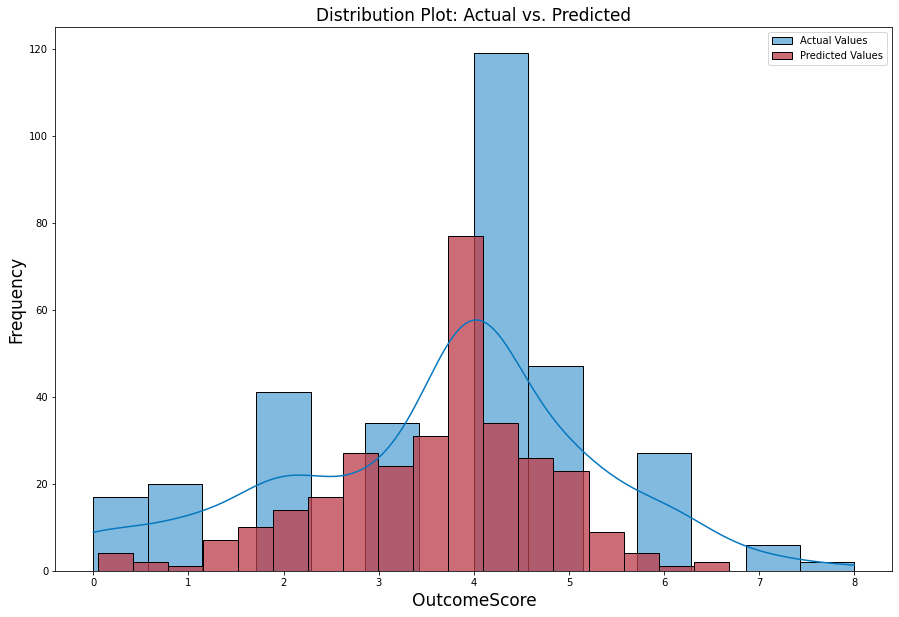

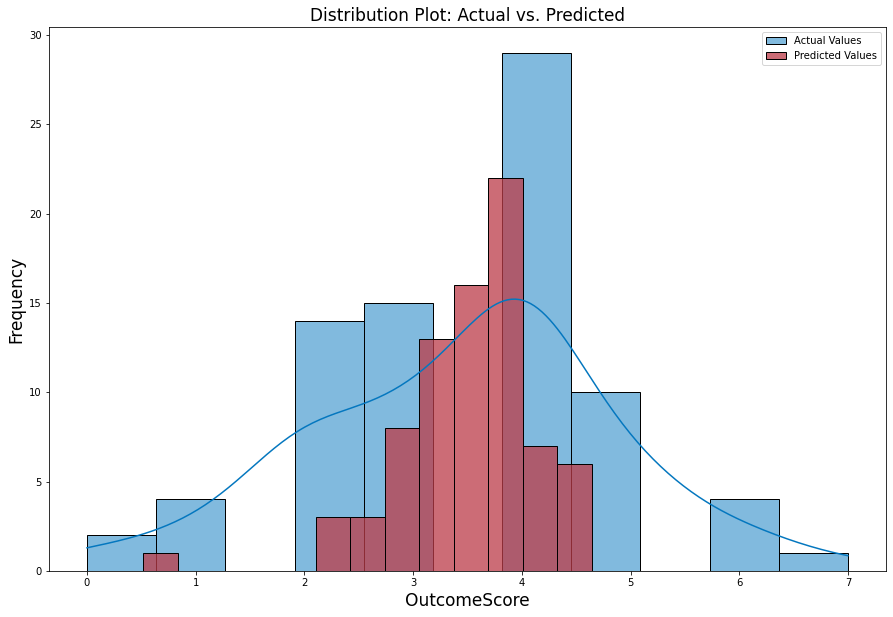

In [33]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements"]]
Y = aggregated_train_1["OutcomeScore"] 

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2,
    random_state=5
) 

# Define the range of parameters to search
param_grid = {'n_estimators': [50, 100, 200, 500]}

# Create the grid search object
grid_search = GridSearchCV(RandomForestRegressor(random_state = 0), param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters found
print(f"Best parameters: {best_params}")
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Predict using the best model found by grid search
randomforest = grid_search.best_estimator_

# Evaluate model performance.
training_predictions = randomforest.predict(X_train) # Get model predictions for training data so we can find R^2 later
testing_predictions = randomforest.predict(X_test)    # Get model predictions for testing data so we can find R^2 later

rsquared_regressor_traning = r2_score(Y_train, training_predictions) # Get R^2 for training data
rsquared_regressor_testing = r2_score(Y_test, testing_predictions) # Get R^2 for testing data

# Evaluate model performance in another way.
training_score = randomforest.score(X_train, Y_train) # Get model score for training data
testing_score = randomforest.score(X_test, Y_test) # Get model score for testing data

print()
print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'R Squared for Training {rsquared_regressor_traning:.3f}')
print(f'R Squared for Testing {rsquared_regressor_testing:.3f}')

# Feature importanace
print()
for name, score in zip(X.columns, randomforest.feature_importances_):
    print(name,np.round(score,3))

# Plotting Training
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_train,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(training_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

# SVM

c:\Users\hudak\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'C': 0.1, 'coef0': 0.01}

Training score is 0.406
Testing score is 0.342

R Squared for Training -0.022
R Squared for Testing -0.127

Accuracy Score: 0.342


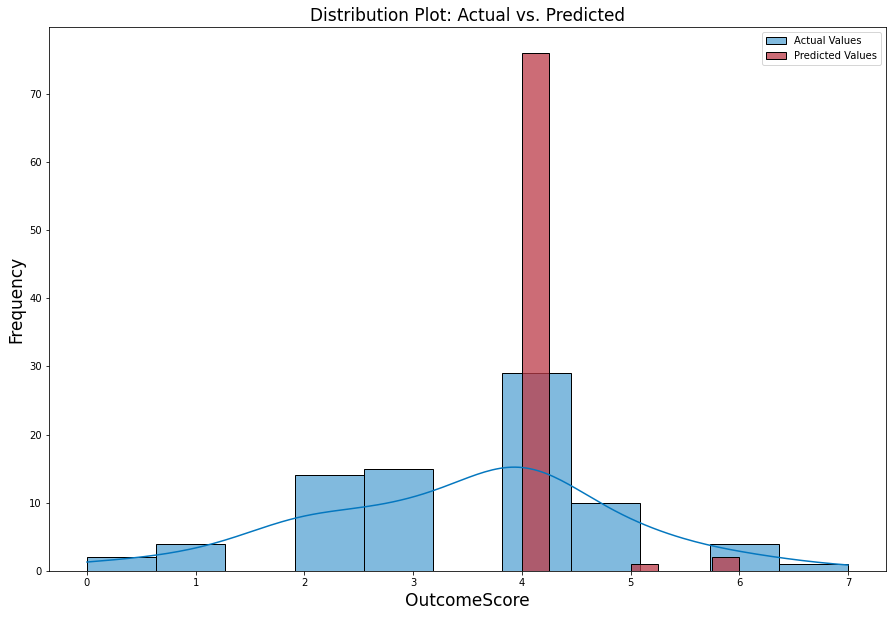

In [34]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]] 
Y = aggregated_train_1["OutcomeScore"] 

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=5) 

# Define the parameter grid to search over
param_grid = {'coef0': [0.01, 0.1, 1, 10], 'C': [0.1, 1, 10, 100]}

# Create the grid search object
grid_search = GridSearchCV(SVC(kernel='poly', degree=3), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters found
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
model = grid_search.best_estimator_

training_predictions = model.predict(X_train) # Get model predictions for traning data so we can find R^2 later
testing_predictions = model.predict(X_test) # Get model predictions for testing data so we can find R^2 later

rsquared_regressor_traning = r2_score(Y_train, training_predictions) # Get R^2 for training data
rsquared_regressor_testing = r2_score(Y_test, testing_predictions) # Get R^2 for testing data

# Evaluate model performance in another way.
training_score = model.score(X_train, Y_train) # Get model score for training data
testing_score = model.score(X_test, Y_test) # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print()
print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'R Squared for Training {rsquared_regressor_traning:.3f}')
print(f'R Squared for Testing {rsquared_regressor_testing:.3f}')
print()
print(f'Accuracy Score: {accuracy:.3f}')

# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()


c:\Users\hudak\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'C': 0.1, 'gamma': 0.001}

Training score is 0.380
Testing score is 0.367

R Squared for Training -0.052
R Squared for Testing -0.147

Accuracy Score: 0.367


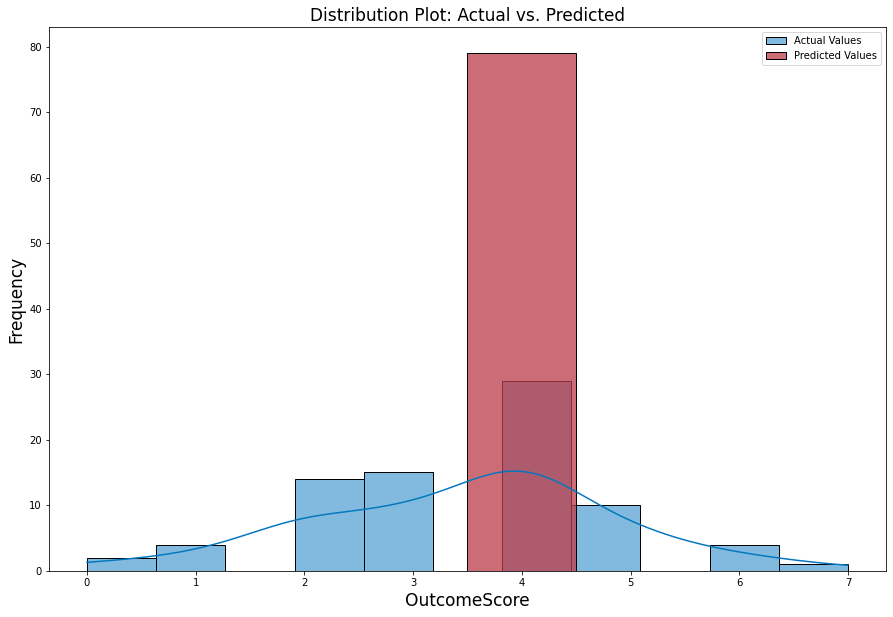

In [35]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]]
Y = aggregated_train_1["OutcomeScore"] 

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=5) 

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create the grid search object
grid_search = GridSearchCV(SVC(kernel='rbf', degree=3), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters found
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
model = grid_search.best_estimator_

training_predictions = model.predict(X_train) # Get model predictions for training data so we can find R^2 later
testing_predictions = model.predict(X_test) # Get model predictions for testing data so we can find R^2 later

rsquared_regressor_traning = r2_score(Y_train, training_predictions) # Get R^2 for traning data
rsquared_regressor_testing = r2_score(Y_test, testing_predictions) # Get R^2 for testing data

# Evaluate model performance in another way.
training_score = model.score(X_train, Y_train)  # Get model score for training data
testing_score = model.score(X_test, Y_test)  # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print()
print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'R Squared for Training {rsquared_regressor_traning:.3f}')
print(f'R Squared for Testing {rsquared_regressor_testing:.3f}')
print()
print(f'Accuracy Score: {accuracy:.3f}')

# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

# Model Development

### Creating the Grade Column 

In [36]:
# Create a new column called 'Grade' to store the categorized values
aggregated_train_1['Grade'] = ''

# Categorize the values based on the Australian grading system
aggregated_train_1.loc[aggregated_train_1['OutcomeScore'] > 5, 'Grade'] = 'High'
aggregated_train_1.loc[(aggregated_train_1['OutcomeScore'] > 2) & (aggregated_train_1['OutcomeScore'] <= 5), 'Grade'] = 'Medium'
aggregated_train_1.loc[aggregated_train_1['OutcomeScore'] <= 2, 'Grade'] = 'Low'

# Print the updated dataset with the categorized grades
aggregated_train_1.head()


,implementation,userIDs,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,wordCount,OutcomeScore,Grade
0,a,1,3,26,30,3,6,19,3778,4,Medium
1,a,2,2,4,17,0,4,0,704,4,Medium
2,a,3,1,4,3,0,1,0,157,4,Medium
3,a,4,2,2,3,1,5,0,349,4,Medium
4,a,5,0,0,6,0,2,0,342,2,Low


### Text Analysis

In [38]:
#!pip install textblob
import spacy
from textblob import TextBlob
import pandas as pd


df = pd.read_csv('virtualInternshipData_ADS2001.csv', encoding = "latin1")
nlp = spacy.load("en_core_web_sm")
sentences = df["content"]
sentences = [sentence for sentence in sentences]

df2 = pd.DataFrame({'content': sentences})


def perform_sentiment_analysis(text):
    doc = nlp(text)
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"


df2['sentiment'] = df2['content'].apply(perform_sentiment_analysis)


mapping = {'Neutral': 0, 'Positive': 1, 'Negative': -1}


df2['sentiment'] = df2['sentiment'].map(mapping)


df = pd.read_csv('virtualInternshipData_ADS2001.csv', encoding = "latin1")

column_to_replace = 'content' 


df[column_to_replace] = df2['sentiment'].fillna(df[column_to_replace])

dfdf = df.drop(df[df['RoleName'] == 'Mentor'].index)
df_dummies = pd.get_dummies(dfdf, columns = ["roomName"], prefix = "RN")
df['content'] = df['content'].astype(int)

In [39]:
df = pd.read_csv('virtualInternshipData_ADS2001.csv', encoding = "latin1")

df['content'] = df['content'].astype(str).str.lower()

regexp = RegexpTokenizer('\w+')

df['content_token']=df['content'].apply(regexp.tokenize)

stopwords = nltk.corpus.stopwords.words("english")
my_stopwords = ['https', 'one', 'said', 'made', 'know', 'use', 'maybe', 'give', 'yes', 'okay', 'got', 'pick', 'say', 'try', 'look', 'think', 'cnt', 'well', 'good', 'agree']
stopwords.extend(my_stopwords)

df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])

df['content_string'] = df['content_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

all_words = ' '.join([word for word in df['content_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [40]:
fdist = FreqDist(tokenized_words)
df['content_string_fdist'] = df['content_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [41]:
wordnet_lem = WordNetLemmatizer()

df['content_string_lem'] = df['content_string_fdist'].apply(wordnet_lem.lemmatize)

(-0.5, 599.5, 399.5, -0.5)

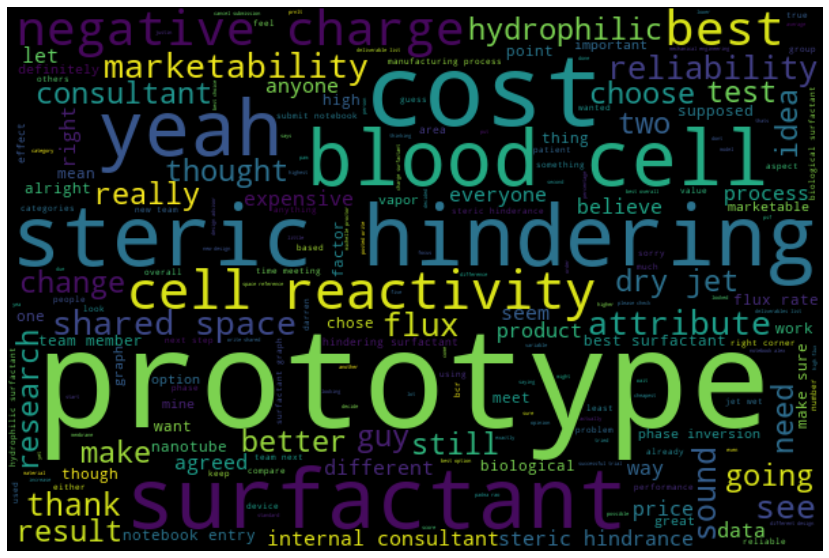

In [42]:
all_words_lem = ' '.join([word for word in df['content_string_lem']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=1, 
                     max_font_size=100).generate(all_words_lem)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [43]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

top_10 = fd.most_common(10)

fdist = pd.Series(dict(top_10))

In [44]:
fig = px.bar(y=fdist.index, x=fdist.values)

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'}, title='Most Common Words in Teams Chat')
fig.update_xaxes(title_text = 'Frequency')
fig.update_yaxes(title_text = 'Word')
fig.show()

# Logistic Regression With Grade

Training score is 0.655
Testing score is 0.620

Accuracy Score: 0.620


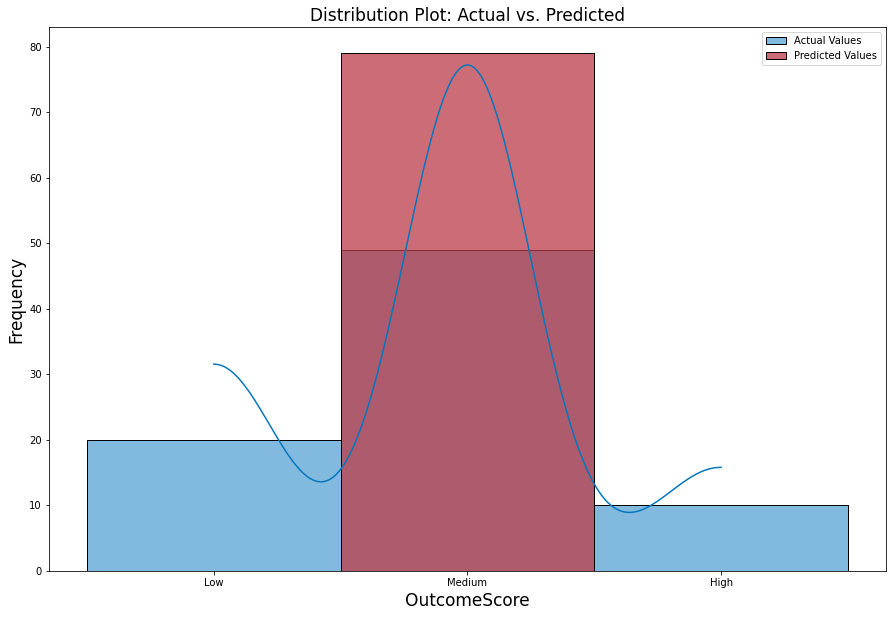

In [45]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]] 
Y = aggregated_train_1["Grade"]

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=40) 

# Construct and fit the model
logistic = LogisticRegression()  # Instantatiate the linear regression model
logistic.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = logistic.predict(X_train)  # Get model predictions for training data so we can find R^2 later
testing_predictions = logistic.predict(X_test)   # Get model predictions for testing data so we can find R^2 later

# Evaluate model performance in another way.
training_score = logistic.score(X_train, Y_train) # Get model score for training data
testing_score = logistic.score(X_test, Y_test) # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'Accuracy Score: {accuracy:.3f}')

# Plotting Training
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

# Decision Tree with Grade

Best parameters: {'max_depth': 2}

Training score is 0.658
Testing score is 0.696

Accuracy Score: 0.696


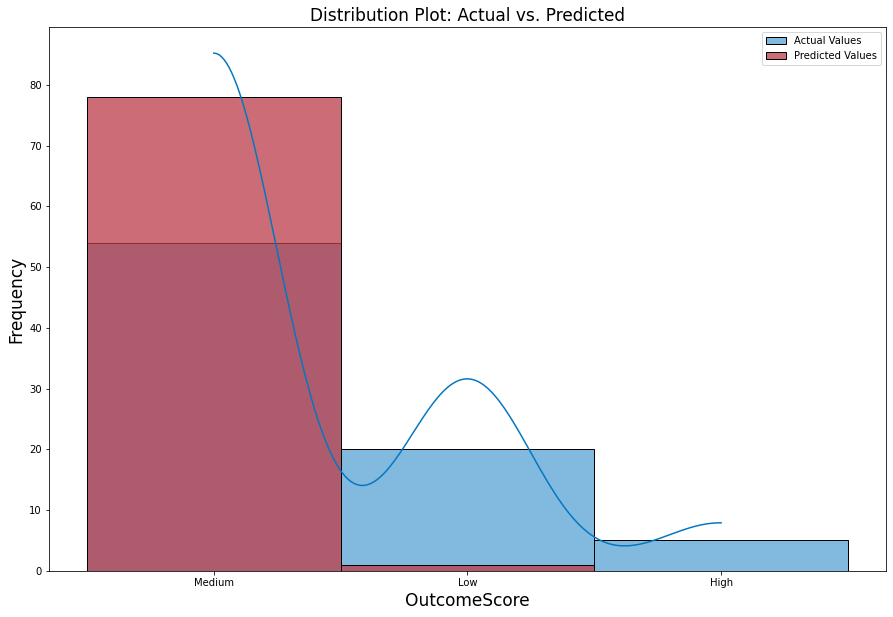

In [46]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]] 
Y = aggregated_train_1["Grade"] 

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2,
    random_state=5) 

# Define the range of values to search
param_grid = {'max_depth': [1, 2, 3, 4, 5]}

DecisionTree = DecisionTreeClassifier(random_state = 42) 

# Create a grid search object
grid_search = GridSearchCV(DecisionTree, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X, Y)

# Print the best hyperparameters found
print(f"Best parameters: {grid_search.best_params_}")

# Retrieve the best model found by grid search
decision_tree = grid_search.best_estimator_

# Evaluate model performance.
training_predictions = decision_tree.predict(X_train) # Get model predictions for training data so we can find R^2 later
testing_predictions = decision_tree.predict(X_test)    # Get model predictions for testing data so we can find R^2 later

# Evaluate model performance in another way.
training_score = decision_tree.score(X_train, Y_train) # Get model score for training data
testing_score = decision_tree.score(X_test, Y_test) # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print()
print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'Accuracy Score: {accuracy:.3f}')


# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test, label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

# SVM with Grade

Best parameters: {'C': 0.1, 'coef0': 0.01}

Training score is 0.645
Testing score is 0.671

Accuracy Score: 0.671


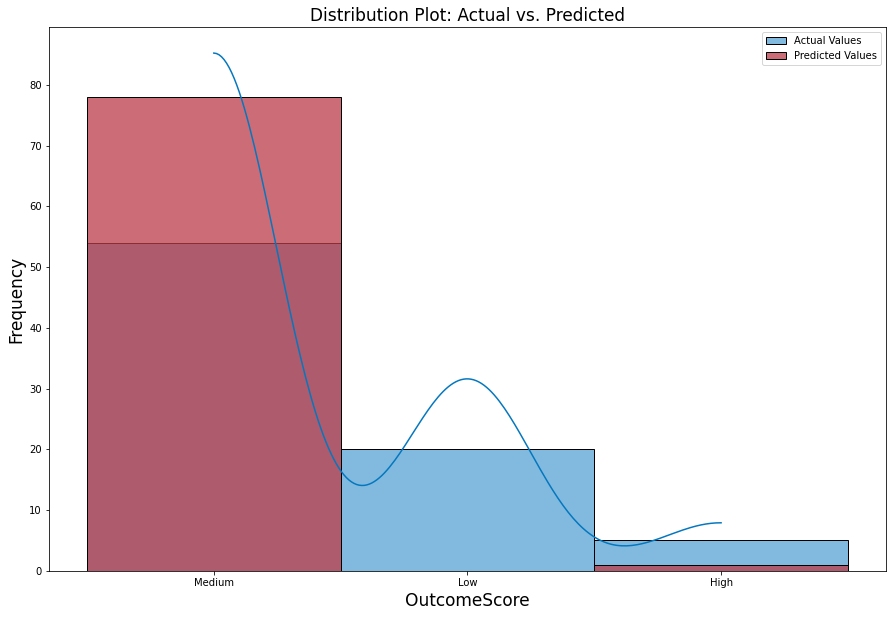

In [47]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]] 
Y = aggregated_train_1["Grade"] 

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=5) 

# Define the parameter grid to search over
param_grid = {'coef0': [0.01, 0.1, 1, 10], 'C': [0.1, 1, 10, 100]}

# Create the grid search object
grid_search = GridSearchCV(SVC(kernel='poly', degree=3), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters found
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
model = grid_search.best_estimator_

training_predictions = model.predict(X_train) # Get model predictions for traning data so we can find R^2 later
testing_predictions = model.predict(X_test) # Get model predictions for testing data so we can find R^2 later

# Evaluate model performance in another way.
training_score = model.score(X_train, Y_train) # Get model score for training data
testing_score = model.score(X_test, Y_test) # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print()
print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'Accuracy Score: {accuracy:.3f}')

# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

Best parameters: {'C': 0.1, 'gamma': 0.001}

Training score is 0.639
Testing score is 0.684

Accuracy Score:, 0.684


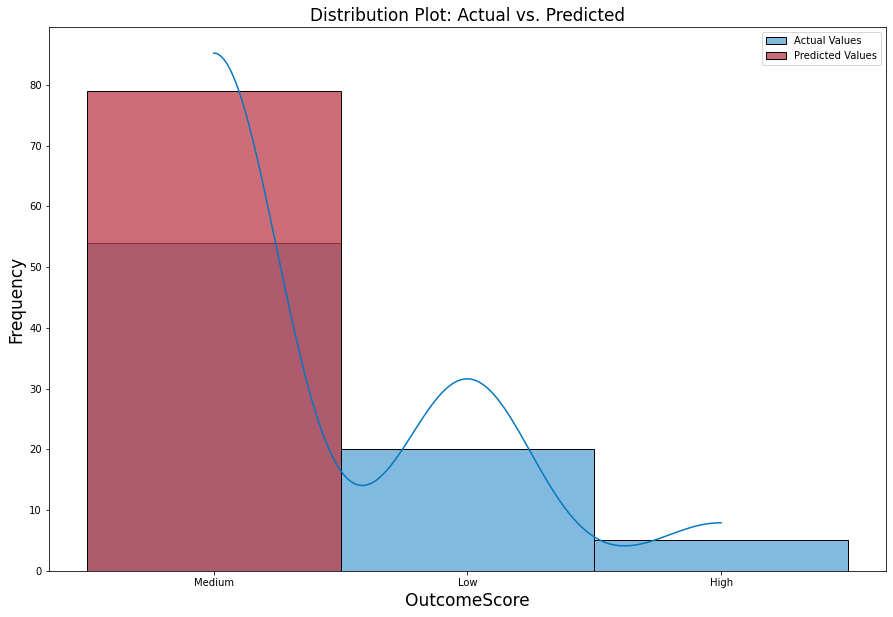

In [48]:
X = aggregated_train_1[['wordCount', "m_experimental_testing", "m_making_design_choices", "m_asking_questions","j_customer_consultants_requests",
                        "j_performance_parameters_requirements", "j_communication"]]
Y = aggregated_train_1["Grade"] 

nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=5
) 

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create the grid search object
grid_search = GridSearchCV(SVC(kernel='rbf', degree=3), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters found
print(f"Best parameters: {best_params}")

# Predict using the best model found by grid search
model = grid_search.best_estimator_

training_predictions = model.predict(X_train) # Get model predictions for training data so we can find R^2 later
testing_predictions = model.predict(X_test) # Get model predictions for testing data so we can find R^2 later

# Evaluate model performance in another way.
training_score = model.score(X_train, Y_train)  # Get model score for training data
testing_score = model.score(X_test, Y_test)  # Get model score for testing data

# Evaluate model performance in another way.
accuracy = accuracy_score(Y_test, testing_predictions)

print()
print(f'Training score is {training_score:.3f}')
print(f'Testing score is {testing_score:.3f}')
print()
print(f'Accuracy Score:, {accuracy:.3f}')

# Plotting Testing
colors1 = ["#0477BF", "#BC3B48"]
plt.figure(figsize=(15, 10))
sns.histplot(Y_test,label='Actual Values',kde=True,  color=colors1[0])
sns.histplot(testing_predictions,  label='Predicted Values', color=colors1[1])
plt.xlabel('OutcomeScore',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('Distribution Plot: Actual vs. Predicted',fontsize=17)
plt.legend()
plt.show()

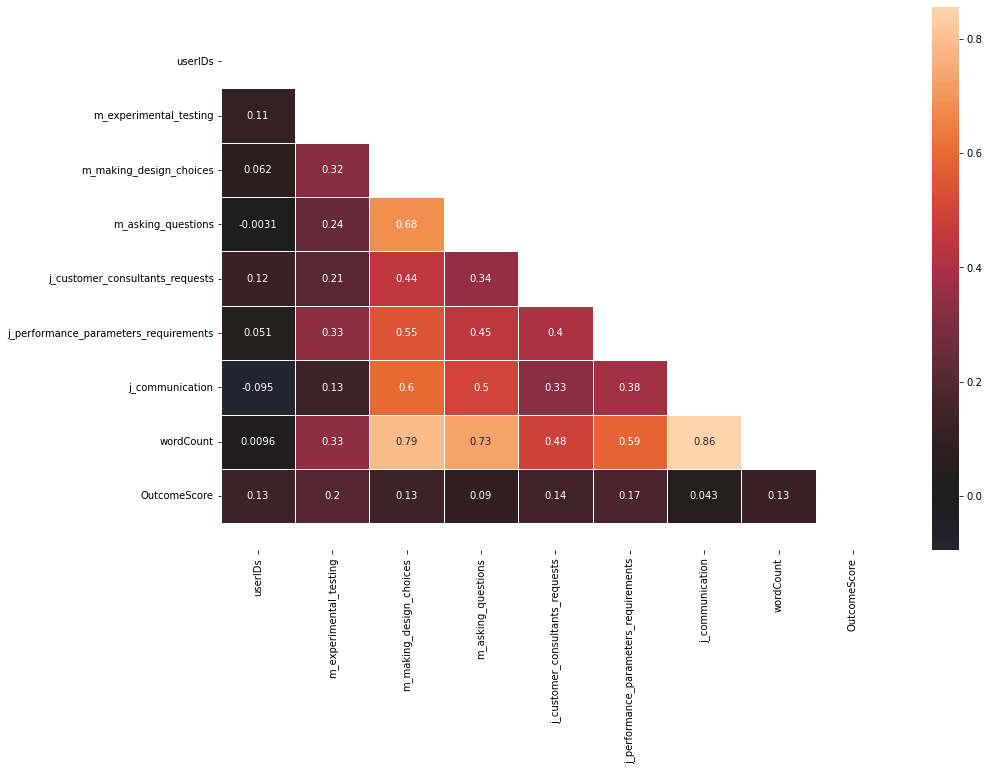

In [49]:
corrs = aggregated_train_1.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(15, 10)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=False, linewidths=0.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);